In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [270]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [271]:
df.shape

(10000, 14)

In [272]:
for col in df.columns:
  print(df[col].value_counts())
  print('*'*120)

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
************************************************************************************************************************
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
************************************************************************************************************************
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
************************************************************************************************************************
CreditScore
850    233
678     63
655     54
7

In [273]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [274]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [275]:
for col in df.columns:
  print(f"{col} -> {df[col].dtype}")

Surname -> object
CreditScore -> int64
Geography -> object
Gender -> object
Age -> int64
Tenure -> int64
Balance -> float64
NumOfProducts -> int64
HasCrCard -> int64
IsActiveMember -> int64
EstimatedSalary -> float64
Exited -> int64


In [276]:
df['Surname'].value_counts()

,count
Surname,
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Izmailov,1
Bold,1
Bonham,1


In [277]:
df.isna().sum()

,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [279]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [280]:
df = pd.get_dummies(df, columns=['Surname', 'Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abbie,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,...,False,False,False,False,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,...,False,False,False,False,False,False,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,...,False,False,False,False,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,...,False,False,False,False,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,...,False,False,False,False,False,False,False,False,True,False


In [281]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [282]:
col = X.columns

In [283]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=col)

In [284]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abbie,Surname_Abbott,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,1.742740,-1.095988


In [285]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [286]:
y.value_counts()

,count
Exited,
0,7963
1,2037


#Simple Neural Network

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6725 - loss: 0.8439 - val_accuracy: 0.7981 - val_loss: 0.5415
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7657 - loss: 0.5728 - val_accuracy: 0.7994 - val_loss: 0.5261
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7908 - loss: 0.5003 - val_accuracy: 0.7994 - val_loss: 0.5212
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7998 - loss: 0.4577 - val_accuracy: 0.7950 - val_loss: 0.5338
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8114 - loss: 0.4072 - val_accuracy: 0.7906 - val_loss: 0.5607
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8216 - loss: 0.3866 - val_accuracy: 0.7844 - val_loss: 0.5758
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8290 - loss: 0.3699 - val_accuracy: 0.7775 - val_loss: 0.6206
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8383 - loss: 0.3400 - val_accuracy: 0.

In [289]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.5717


[0.6307004690170288, 0.7754999995231628]

In [290]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1593
           1       0.34      0.11      0.16       407

    accuracy                           0.78      2000
   macro avg       0.57      0.53      0.52      2000
weighted avg       0.71      0.78      0.73      2000



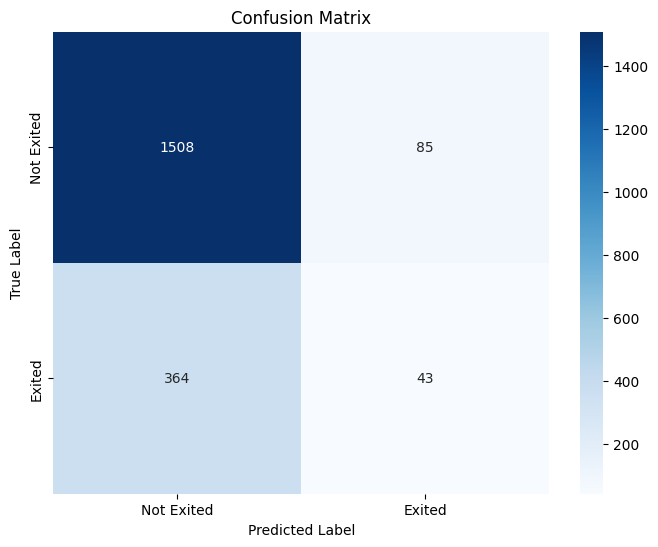

In [291]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Undersampling

In [292]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [293]:
df_class_0 = df[df['Exited'] == 0]
df_class_1 = df[df['Exited'] == 1]

# Sample 3000 rows from class 0
df_class_0_sampled = df_class_0.sample(n=2037, random_state=42)

# Combine the sampled class 0 data with all of class 1 data
df_balanced = pd.concat([df_class_0_sampled, df_class_1])

# Shuffle the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Exited'].value_counts())

Exited
0    2037
1    2037
Name: count, dtype: int64


In [294]:
df_balanced['Exited'].value_counts()

,count
Exited,
0,2037
1,2037


In [295]:
Undersampling_df = pd.DataFrame(df_balanced,columns=df.columns)
Undersampling_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abbie,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,655,72,5,138089.97,2,1,1,99920.41,0,False,...,False,False,False,False,False,False,False,True,False,False
1,777,32,2,0.00,1,1,0,136458.19,1,False,...,False,False,False,False,False,False,False,False,False,False
2,632,38,6,86569.76,2,1,0,98090.91,0,False,...,False,False,False,False,False,False,False,True,False,False
3,662,34,2,117731.79,2,0,1,55120.79,0,False,...,False,False,False,False,False,False,False,False,False,True
4,678,28,4,0.00,2,1,1,144423.17,1,False,...,False,False,False,False,False,False,False,False,False,False


In [296]:
Undersampling_df.shape

(4074, 2943)

In [297]:
X = Undersampling_df.drop('Exited',axis=1)
y = Undersampling_df['Exited']

In [298]:
y.shape,X.shape

((4074,), (4074, 2942))

In [299]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=col)

In [300]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abbie,Surname_Abbott,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,0.064151,2.892217,0.006801,0.915483,0.724545,0.643500,1.080288,-0.020626,-0.015669,-0.015669,...,-0.015669,0.0,-0.015669,0.0,0.0,-0.015669,-0.015669,1.507411,-0.543119,-1.023346
1,1.313559,-0.860595,-1.032148,-1.343806,-0.760262,0.643500,-0.925679,0.613038,-0.015669,-0.015669,...,-0.015669,0.0,-0.015669,0.0,0.0,-0.015669,-0.015669,-0.663389,-0.543119,-1.023346
2,-0.171393,-0.297673,0.353117,0.072561,0.724545,0.643500,-0.925679,-0.052354,-0.015669,-0.015669,...,-0.015669,0.0,-0.015669,0.0,0.0,-0.015669,-0.015669,1.507411,-0.543119,-1.023346
3,0.135838,-0.672954,-1.032148,0.582403,0.724545,-1.554001,1.080288,-0.797572,-0.015669,-0.015669,...,-0.015669,0.0,-0.015669,0.0,0.0,-0.015669,-0.015669,-0.663389,-0.543119,0.977187
4,0.299695,-1.235876,-0.339516,-1.343806,0.724545,0.643500,1.080288,0.751172,-0.015669,-0.015669,...,-0.015669,0.0,-0.015669,0.0,0.0,-0.015669,-0.015669,-0.663389,-0.543119,-1.023346


In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [302]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4907 - loss: 0.8848 - val_accuracy: 0.5583 - val_loss: 0.6870
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5496 - loss: 0.7604 - val_accuracy: 0.5690 - val_loss: 0.6891
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5861 - loss: 0.6963 - val_accuracy: 0.5706 - val_loss: 0.6849
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6398 - loss: 0.6369 - val_accuracy: 0.5828 - val_loss: 0.6868
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6818 - loss: 0.5875 - val_accuracy: 0.5859 - val_loss: 0.6866
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7222 - loss: 0.5461 - val_accuracy: 0.5982 - val_loss: 0.7117
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7472 - loss: 0.5064 - val_accuracy: 0.5966 - val_loss: 0.7390
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7869 - loss: 0.4458 - val_accuracy: 0.6028 - val_loss

In [303]:
model.evaluate(X_test,y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5974 - loss: 0.8603 


[0.8877943754196167, 0.5705521702766418]

In [304]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       408
           1       0.57      0.60      0.58       407

    accuracy                           0.57       815
   macro avg       0.57      0.57      0.57       815
weighted avg       0.57      0.57      0.57       815



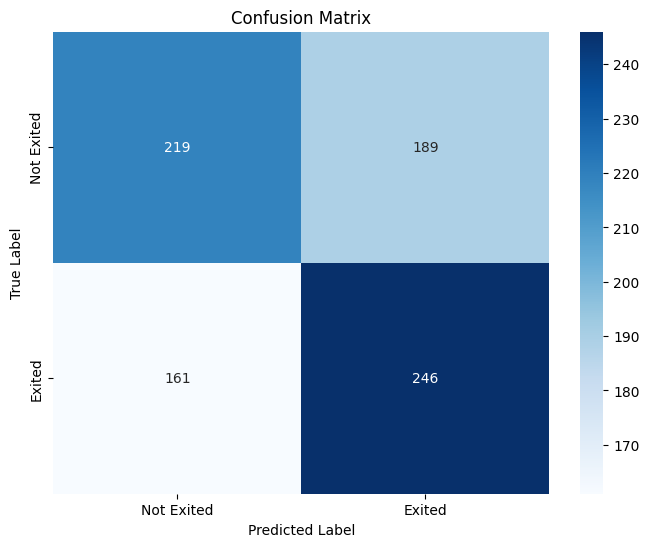

In [305]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#OverSampling using SMOTE

In [306]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [307]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [308]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abbie,Surname_Abbott,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,...,False,False,False,False,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,...,False,False,False,False,False,False,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,...,False,False,False,False,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,...,False,False,False,False,False,False,False,False,True,False


In [309]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=col)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abbie,Surname_Abbott,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.010001,-0.020004,...,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144,-0.578736,1.742740,-1.095988


In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [311]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Exited
0    6370
1    1630
Name: count, dtype: int64
After SMOTE: Exited
1    6370
0    6370
Name: count, dtype: int64


In [312]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7237 - loss: 0.7618 - val_accuracy: 0.7969 - val_loss: 0.5492
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7764 - loss: 0.5717 - val_accuracy: 0.7981 - val_loss: 0.5361
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7919 - loss: 0.4988 - val_accuracy: 0.7981 - val_loss: 0.5187
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8005 - loss: 0.4399 - val_accuracy: 0.7956 - val_loss: 0.5296
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8070 - loss: 0.4005 - val_accuracy: 0.7912 - val_loss: 0.5532
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8230 - loss: 0.3823 - val_accuracy: 0.7781 - val_loss: 0.5867
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8368 - loss: 0.3507 - val_accuracy: 0.7812 - val_loss: 0.6199
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8419 - loss: 0.3297 - val_accuracy: 0.

In [313]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 0.5769


[0.6371790766716003, 0.7695000171661377]

In [314]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1593
           1       0.32      0.12      0.17       407

    accuracy                           0.77      2000
   macro avg       0.56      0.53      0.52      2000
weighted avg       0.71      0.77      0.72      2000



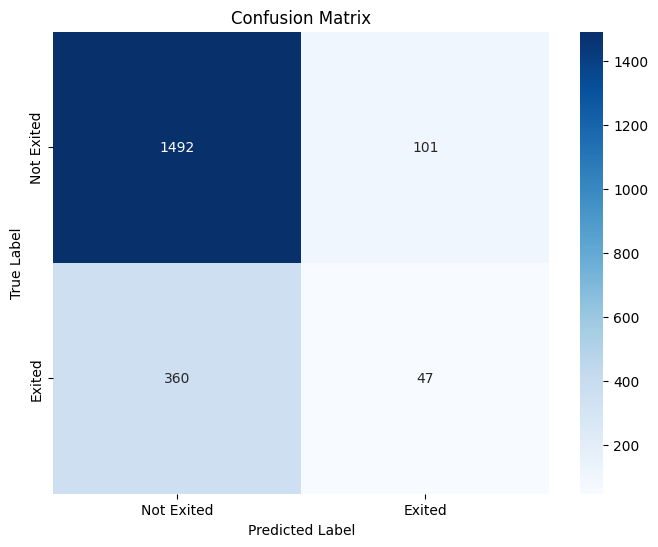

In [315]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()